In [ ]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# If you are running from colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    print('Running on CoLab')
    directory = r'/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset'
else:
    # If you want to run local
    print('Not running on CoLab')
    directory = r'../../data/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset'

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running on CoLab


In [ ]:
print(directory)

/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset


In [ ]:
import os

# Assuming you already have 'directory' and 'categories' defined

category_lengths = {}  # A dictionary to store the lengths of each category

for category in categories:
    category_path = os.path.join(directory, category)
    file_list = os.listdir(category_path)
    category_lengths[category] = len(file_list)

print("Number of files in each category:")
for category, length in category_lengths.items():
    print(f"{category}: {length} files")


Number of files in each category:
Bengin cases: 120 files
Malignant cases: 1346 files
Normal cases: 631 files


In [ ]:
import os
import pandas as pd
from PIL import Image  # Pillow library for image handling

# Assuming you already have 'directory' and 'categories' defined
# And 'category_lengths' calculated as shown in the previous response

# Initialize an empty list to store image data
data = []

# Loop through each category and its corresponding length
for category, length in category_lengths.items():
    category_path = os.path.join(directory, category)

    # Loop through the files in the category folder
    for file_name in os.listdir(category_path):
        # Get the full path of the image file
        file_path = os.path.join(category_path, file_name)

        # Open the image using Pillow
        img = Image.open(file_path)

        # Get the size of the image (width, height)
        size = img.size

        # Append the data as a tuple (category, image file path, width, height) to the list
        data.append((category, file_path, size[0], size[1]))

# Create a Pandas DataFrame from the data list
df = pd.DataFrame(data, columns=['Category', 'Image_Path', 'Width', 'Height'])
# Shuffle the data in the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)



# Print the first few rows of the DataFrame
print(df.head())


          Category                                         Image_Path  Width  \
0     Bengin cases  /content/drive/Shareddrives/cancer-detection-m...    512   
1  Malignant cases  /content/drive/Shareddrives/cancer-detection-m...    415   
2  Malignant cases  /content/drive/Shareddrives/cancer-detection-m...    395   
3  Malignant cases  /content/drive/Shareddrives/cancer-detection-m...    423   
4  Malignant cases  /content/drive/Shareddrives/cancer-detection-m...    512   

   Height  
0     512  
1     281  
2     305  
3     287  
4     512  


In [ ]:
# Assuming you already have the DataFrame 'df' with 'Category', 'Image_Path', and 'Size' columns

# Group the DataFrame by 'Category' and count the occurrences in each group
category_counts = df.groupby('Category').size().reset_index(name='Count')

print(category_counts)


          Category  Count
0     Bengin cases    120
1  Malignant cases   1346
2     Normal cases    631


In [ ]:
df.shape

(2097, 4)

In [ ]:
# Check the count of null values in each column
null_counts = df.isnull().sum()

print(null_counts)

Category      0
Image_Path    0
Width         0
Height        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    2097 non-null   object
 1   Image_Path  2097 non-null   object
 2   Width       2097 non-null   int64 
 3   Height      2097 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 65.7+ KB


In [ ]:
# Assuming you already have the DataFrame 'df' created or loaded with your data

# Extract the value from the first row and the second column
df_new = df.iloc[0:5, 1]

print(df_new)


0    /content/drive/Shareddrives/cancer-detection-m...
1    /content/drive/Shareddrives/cancer-detection-m...
2    /content/drive/Shareddrives/cancer-detection-m...
3    /content/drive/Shareddrives/cancer-detection-m...
4    /content/drive/Shareddrives/cancer-detection-m...
Name: Image_Path, dtype: object


In [ ]:
pip install pydicom

In [ ]:
import pydicom

In [ ]:
# Loop through only the first five rows (0 to 4) of the DataFrame
for i in df_new:
   print(i)

/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (64).jpg
/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (5489).png
/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (5123).png
/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (5482).png
/content/drive/Shareddrives/cancer-detection-model/MERGED The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (346).jpg


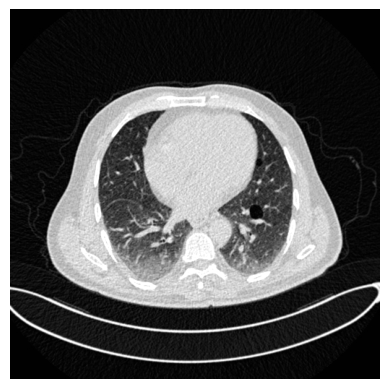

(512, 512)
37
255


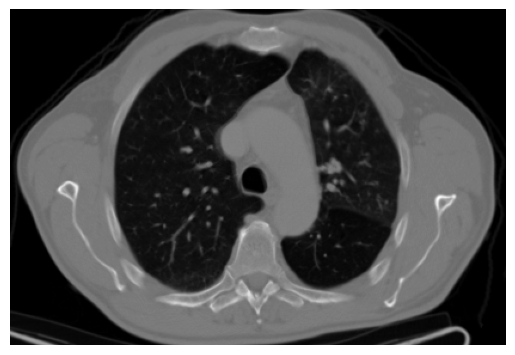

(281, 415)
0
255


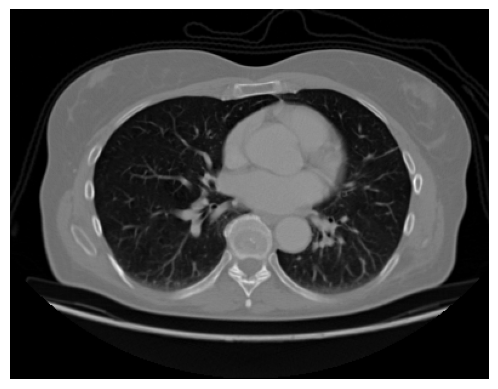

(305, 395)
0
255


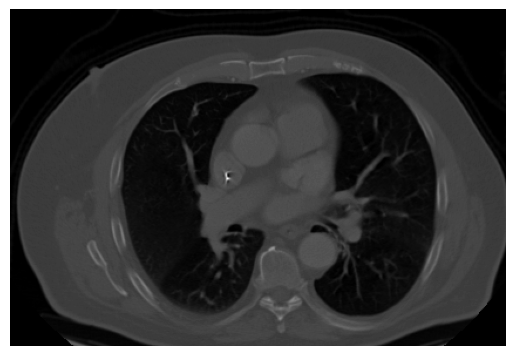

(287, 423)
0
255


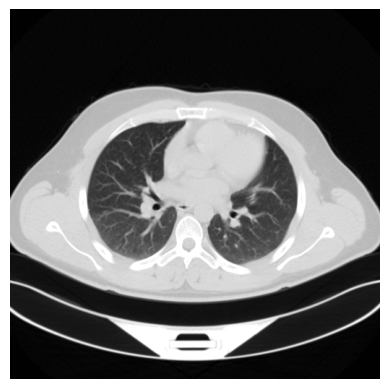

(512, 512)
37
255


In [ ]:
for i in df_new:
  # Load the image as grayscale using Pillow (PIL)
  image = Image.open(i).convert('L')
  image_array = np.array(image)
  plt.imshow(image_array, cmap='gray')  # 'cmap' is used to specify the color map (e.g., grayscale)
  plt.axis('off')  # Turn off axis ticks and labels
  plt.show()
  # Get the shape of the image array
  print(image_array.shape)
  print(image_array.min())
  print(image_array.max())

In [ ]:

def adjust_brightness_contrast(image, brightness=0, contrast=1.0):
    # Apply brightness adjustment
    adjusted_image = image + brightness

    # Apply contrast adjustment
    adjusted_image = np.clip(adjusted_image * contrast, 0, 255).astype(np.uint8)

    return adjusted_image

In [ ]:
# for i in df_new:
#   # Load the image as grayscale using Pillow (PIL)
#   image = Image.open(i).convert('L')
#   image_array = np.array(image)
#   # Adjust brightness and contrast
#   adjusted_image = adjust_brightness_contrast(image_array, brightness=40, contrast = 4)
#   plt.imshow(adjusted_image, cmap='gray')

In [ ]:
def transform_to_hu(image_array, window_center, window_width):
    hu_image = image_array.astype(np.float32)
    hu_image = (hu_image - window_center + 0.5 * window_width) / window_width
    hu_image = np.clip(hu_image, 0.0, 1.0)  # Ensure values are within [0, 1]
    return hu_image


def window_image(image_array, window_center, window_width):
    img_min = window_center - 0.5 * window_width
    img_max = window_center + 0.5 * window_width
    windowed_image = np.clip(image_array, img_min, img_max)
    windowed_image = (windowed_image - img_min) / window_width
    windowed_image = np.clip(windowed_image, 0.0, 1.0)  # Ensure values are within [0, 1]
    return windowed_image

In [ ]:
def remove_noise(image_array, sigma):
    # Apply Gaussian blur filter to remove noise
    noise_removed_image = gaussian_filter(image_array, sigma=sigma)
    return noise_removed_image

In [ ]:
def crop_and_pad_image(image, crop_size, padding_size):
    # Crop the image to the specified crop_size
    h, w = image.shape
    top = (h - crop_size[0]) // 2
    left = (w - crop_size[1]) // 2
    cropped_image = image[top:top + crop_size[0], left:left + crop_size[1]]

    # Add padding to make it a square image
    padded_image = np.pad(cropped_image, ((padding_size[0], padding_size[0]), (padding_size[1], padding_size[1])), mode='constant')
    return padded_image


In [ ]:
def lung_segmentation(image_array):
    # Thresholding to separate lung region from background
    binary_image = image_array > -600  # Adjust threshold value as needed

    # Remove small objects and holes from the binary image
    cleaned_image = morphology.remove_small_objects(binary_image, min_size=5000)
    cleaned_image = morphology.remove_small_holes(cleaned_image, area_threshold=5000)

    # Label connected components in the binary image
    labeled_image = measure.label(cleaned_image)

    # Find the largest connected component, assuming it's the lung
    label_count = np.bincount(labeled_image.ravel())
    label_count[0] = 0  # Exclude background label
    largest_label = np.argmax(label_count)

    # Create a mask containing only the largest connected component (lung region)
    lung_mask = labeled_image == largest_label

    # Apply morphological operations to smooth the mask
    lung_mask = morphology.binary_erosion(lung_mask, selem=morphology.disk(5))
    lung_mask = morphology.binary_closing(lung_mask, selem=morphology.disk(20))

    return lung_mask

In [ ]:
def normalize_image(image):
    # Compute the minimum and maximum pixel values in the image
    min_value = np.min(image)
    max_value = np.max(image)

    # Normalize the image using Min-Max scaling
    normalized_image = (image - min_value) / (max_value - min_value)

    return normalized_image

In [ ]:
from scipy.ndimage import gaussian_filter  # Import the 'gaussian_filter' function
from scipy import ndimage
from skimage import morphology
from scipy.ndimage import median_filter
from skimage import morphology, measure, color
from skimage.feature import hog

(512, 512)


<ipython-input-138-2b0a7108fe56>:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_count = np.bincount(labels.ravel().astype(np.int))
<ipython-input-138-2b0a7108fe56>:38: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  mask = ndimage.morphology.binary_fill_holes(mask)


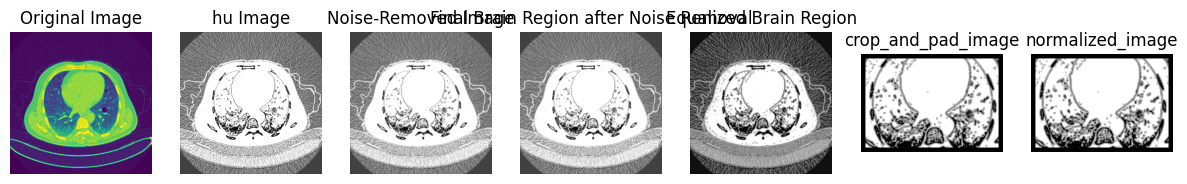

(281, 415)


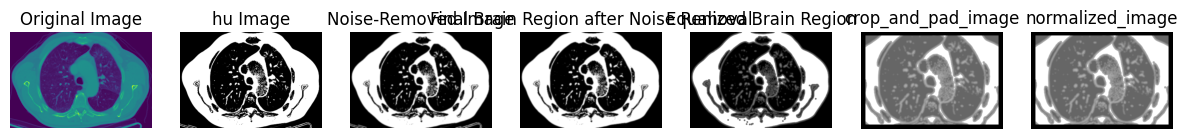

(305, 395)


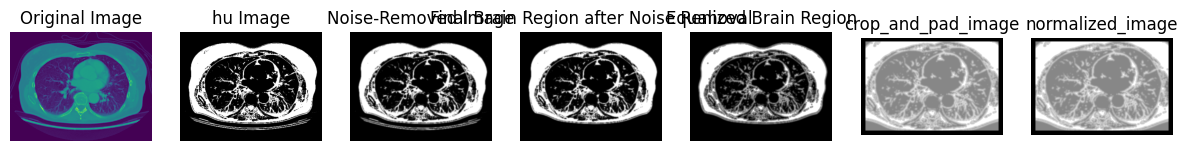

(287, 423)


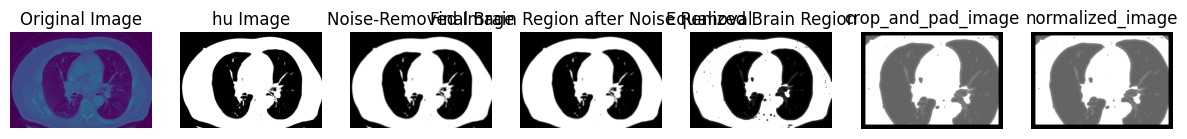

(512, 512)


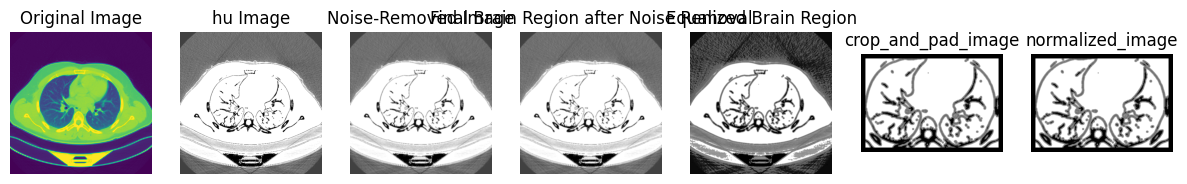

In [ ]:
for i in df_new:
    # Load the image as grayscale using Pillow (PIL)
    image = Image.open(i).convert('L')
    image_array = np.array(image)

    # Convert the pixel data to HU-like values using 'transform_to_hu()' function with window center and width
    window_center = 90  # Adjust the window center as needed
    window_width = 50   # Adjust the window width as needed

    adjusted_image = adjust_brightness_contrast(image_array, brightness= 1, contrast = 2)
    hu_image = transform_to_hu(adjusted_image, window_center, window_width)

    # Remove noise using Gaussian blur with sigma value (adjust as needed)
    sigma = 1.0  # Adjust the sigma value for the amount of blur (higher value for more blur)
    noise_removed_image = remove_noise(hu_image, sigma)

    # # Display the noise-removed image (HU-like values)
    # plt.imshow(noise_removed_image, cmap='gray')
    # plt.axis('off')  # Turn off axis ticks and labels
    # plt.show()

    # Get the shape of the noise-removed image (HU-like values) array
    print(noise_removed_image.shape)

    # Apply segmentation and labeling to identify the brain region in the noise-removed image
    segmentation = morphology.dilation(hu_image, np.ones((1, 1)))
    labels, label_nb = ndimage.label(segmentation)

    label_count = np.bincount(labels.ravel().astype(np.int))
    label_count[0] = 0

    mask = labels == label_count.argmax()

    # Improve the brain mask

    mask = morphology.dilation(mask, np.ones((5, 5)))

    mask = ndimage.morphology.binary_fill_holes(mask)

    mask = morphology.dilation(mask, np.ones((3, 3)))

    # Apply mask to obtain the final brain region after noise removal
    brain_without_noise = mask * noise_removed_image
    # Display the original image and the noise-removed image (HU-like values) side by side
    # Apply Histogram Equalization for Image Intensity Correction
    equalized_brain = exposure.equalize_hist(brain_without_noise)

    crop_size = (200, 300)  # Specify the size of the cropped region
    padding_size = (10, 10)  # Specify the size of the padding to be added
    padded_image = crop_and_pad_image(equalized_brain, crop_size, padding_size)

    # Assuming 'image_array' is the NumPy array representing the image
    normalized_image = normalize_image(padded_image)

    # # Compute HOG features and get the HOG image
    # hog_features, hog_image = hog(padded_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

    # # Normalize the HOG features
    # hog_features = exposure.rescale_intensity(hog_features, in_range=(0, 10))











    fig, axes = plt.subplots(1, 7, figsize=(15, 5))

    # Display the original image
    axes[0].imshow(image_array)
    axes[0].axis('off')  # Turn off axis ticks and labels
    axes[0].set_title('Original Image')

    # Display the original hu_image
    axes[1].imshow(hu_image,cmap='gray')
    axes[1].axis('off')  # Turn off axis ticks and labels
    axes[1].set_title('hu Image')

    # Display the noise-removed image
    axes[2].imshow(noise_removed_image,cmap='gray')
    axes[2].axis('off')  # Turn off axis ticks and labels
    axes[2].set_title('Noise-Removed Image')

     # Display the Final Brain Region after Noise Removalimage
    axes[3].imshow(brain_without_noise,cmap='gray')
    axes[3].axis('off')  # Turn off axis ticks and labels
    axes[3].set_title('Final Brain Region after Noise Removal')

    # Display the Equalized Brain Regionimage
    axes[4].imshow(equalized_brain,cmap='gray')
    axes[4].axis('off')  # Turn off axis ticks and labels
    axes[4].set_title('Equalized Brain Region')

    # Display the crop_and_pad_image
    axes[5].imshow(padded_image,cmap='gray')
    axes[5].axis('off')  # Turn off axis ticks and labels
    axes[5].set_title('crop_and_pad_image')

    # Display the Equalized Brain Regionimage
    axes[6].imshow(normalized_image,cmap='gray')
    axes[6].axis('off')  # Turn off axis ticks and labels
    axes[6].set_title('normalized_image')





    plt.show()






In [ ]:
# def water_bone_correction(image, water_mu, water_atten, bone_mu, bone_atten):
#     """
#     Perform Water-Bone Method for beam hardening correction.

#     Parameters:
#         image (numpy array): Input CT image as a 2D array.
#         water_mu (float): Linear attenuation coefficient of water.
#         water_atten (float): Mass attenuation coefficient of water.
#         bone_mu (float): Linear attenuation coefficient of bone.
#         bone_atten (float): Mass attenuation coefficient of bone.

#     Returns:
#         corrected_image (numpy array): Beam-hardening corrected CT image.
#     """
#     # Convert the CT image to linear attenuation
#     linear_attenuation = (image - water_mu) / (bone_mu - water_mu)

#     # Correct for beam hardening using Water-Bone Method
#     corrected_linear_attenuation = (linear_attenuation - water_atten) / (bone_atten - water_atten)

#     # Convert the corrected linear attenuation back to CT image values
#     corrected_image = (corrected_linear_attenuation * (bone_mu - water_mu)) + water_mu

#     # Clip image values to ensure they are within valid range (typically -1024 to 3071)
#     corrected_image = np.clip(corrected_image, -1024, 3071)

#     return corrected_image

In [ ]:
# import matplotlib.pyplot as plt
# from skimage import exposure
# import scipy.ndimage as ndimage
# # Loop through 'df_new' to process and display images
# for index, image_path in enumerate(df_new):
#     # Load the image as grayscale using Pillow (PIL)
#     image = Image.open(image_path).convert('L')
#     image_array = np.array(image)

#     # Apply Hounsfield Unit correction (replace 'slope' and 'intercept' with appropriate values)
#     slope = 1.0
#     intercept = -1024
#     corrected_image = hounsfield_unit_correction(image_array, slope, intercept)

#     # Apply image preprocessing
#     slice_thickness = 1.0  # Replace with the actual slice thickness of the image
#     target_thickness = 4.0  # Replace with the desired target thickness
#     preprocessed_image = image_preprocessing(image_path, slice_thickness, target_thickness)

#     # Apply noise reduction
#     blurred_image = noise_reduction(corrected_image)

#     # Apply contrast enhancement
#     enhanced_image = contrast_enhancement(blurred_image)


#     # Display the original, corrected, and preprocessed images using matplotlib
#     plt.figure(figsize=(18, 6))
#     plt.subplot(1, 3, 1)
#     plt.imshow(image_array, cmap='gray')
#     plt.title('Original Image')
#     plt.axis('off')

#     plt.subplot(1, 3, 2)
#     plt.imshow(corrected_image, cmap='gray')
#     plt.title('Corrected Image')
#     plt.axis('off')

#     plt.subplot(1, 3, 3)
#     plt.imshow(preprocessed_image, cmap='gray')
#     plt.title('Preprocessed Image')
#     plt.axis('off')

#     plt.show()

# # Close all open windows after displaying all images
# plt.close('all')

